In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine learning algorithms/calories.csv')

In [ ]:
df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [ ]:
df.shape

(15000, 2)

In [15]:
import pandas as pd
import string
import numpy as np
import json
from tensorflow import keras

In [13]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku
import tensorflow as tf
tf.random.set_seed(2)
from numpy.random import seed
seed(1)

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

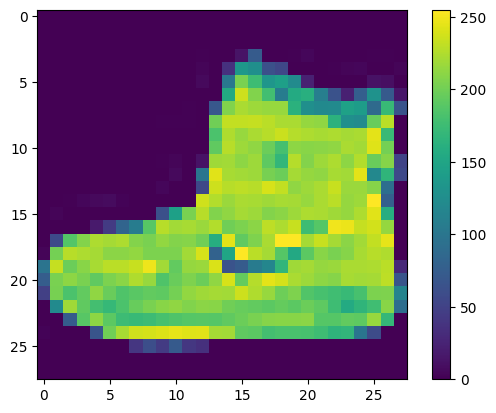

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0


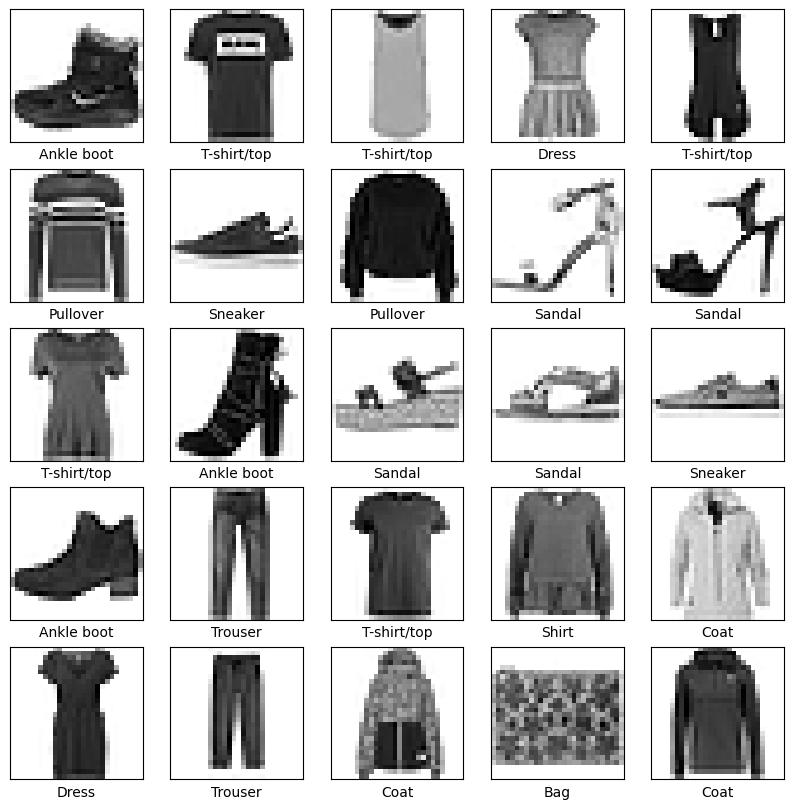

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model= tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(train_images,train_labels,epochs=10)
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5010 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3819 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3406 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3151 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2980 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2821 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2723 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2606 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2483 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - lo

In [32]:
#A prediction is an array of 10 numbers. They represent the “confidence” of the model that the image matches each of the 10 different garments
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions=probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([1.8690947e-07, 2.5499994e-10, 5.7466296e-11, 1.1627257e-10,
       1.0828132e-09, 2.6528172e-03, 1.7435434e-08, 8.1561673e-03,
       1.4989745e-08, 9.8919082e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

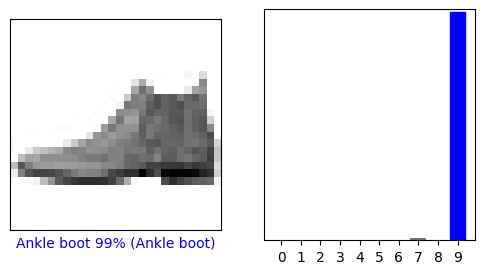

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

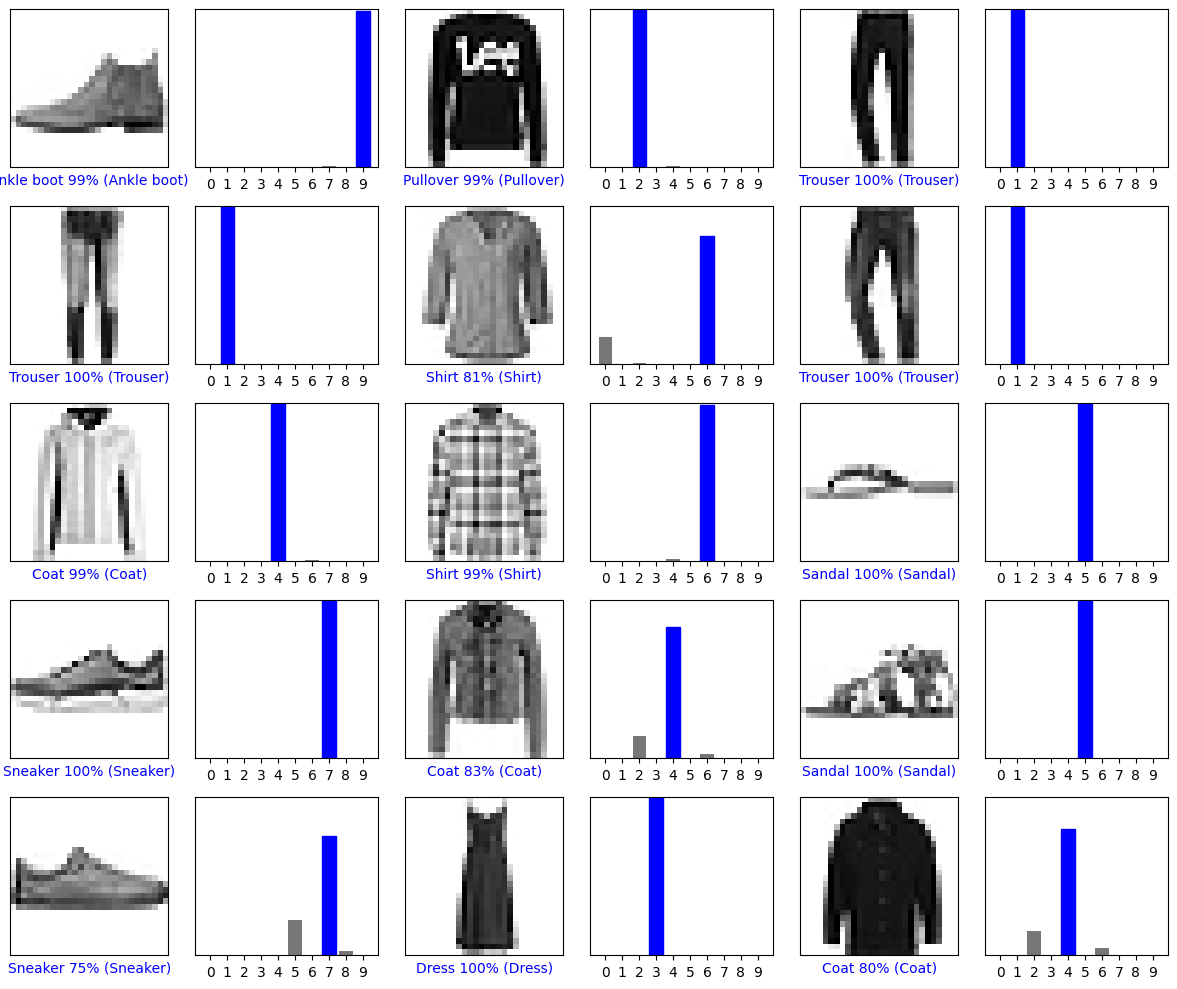

In [37]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()